### Import Data
***

In [76]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

pd.set_option("display.max.columns", None)

# -------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data',
                                    'tl_2022_us_state',
                                    'tl_2022_us_state.shp')
                                    )

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

### Prepare Alaska Multipolygon
***

In [77]:
for df in [states, places, roads]:
    df.columns = df.columns.str.lower()

<Axes: >

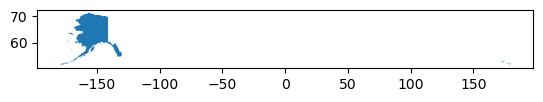

In [78]:
alaska = states[states.name =='Alaska']
alaska.plot()

In [79]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS
print('Is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

Is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

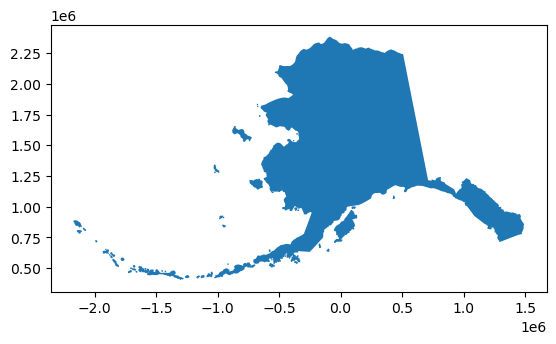

In [80]:
alaska.plot()

### Prepare populated places points
***

In [81]:
print(f"CRS: {places.crs}")

places.head(3)

CRS: EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)


<Axes: >

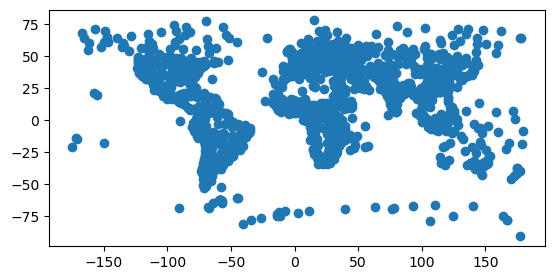

In [82]:
places.plot()

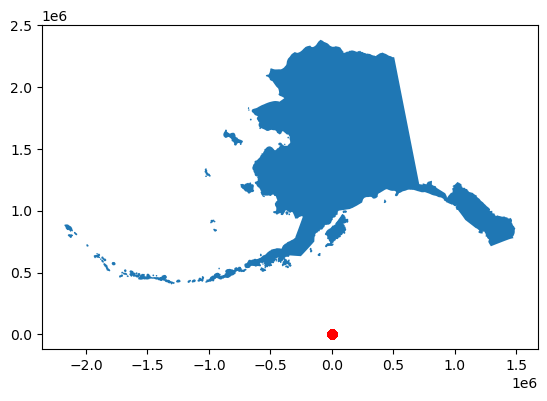

In [83]:
# Trouble
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

plt.show()

### Check-In
*** 
**Reproject the places geo-datafarme into alaska’s CRS and verify the CRSs match using assert.**

In [84]:
if places.crs != alaska.crs:
    places = places.to_crs(alaska.crs)
assert (places.crs == alaska.crs)

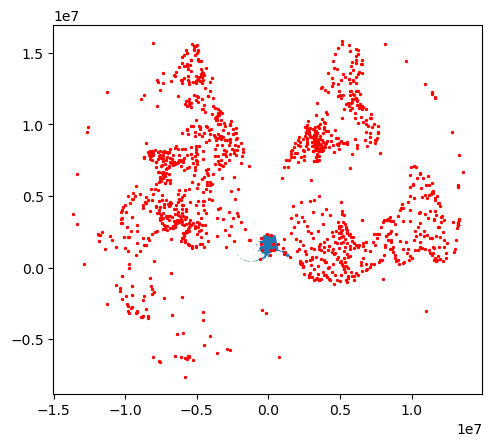

In [85]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red', markersize=2)

plt.show()

### Clipping
***

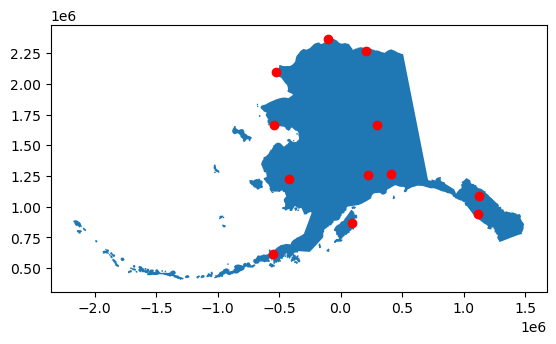

In [86]:
# Clip populated places to Alaska multipolygon
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')
plt.show()

### Prepare roads
***

In [87]:
print(roads.crs)

roads.head(3)

EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<Axes: >

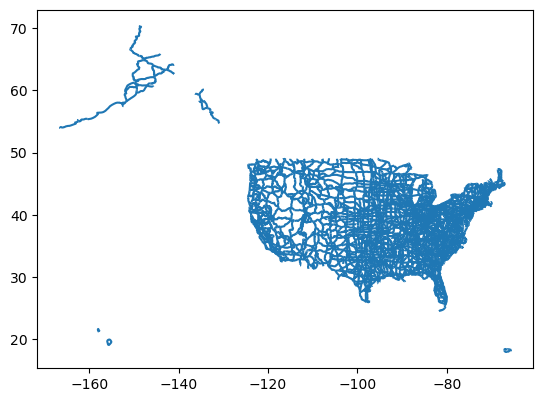

In [88]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

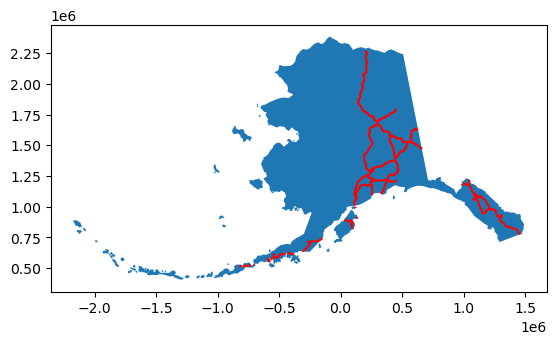

In [89]:
# Clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)


fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color='red')
plt.show()

### BBOX
***

In [90]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

# Create geo-dataframe from bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox],  # Assign geometry column
                           crs = alaska.crs)  # Assign CRS
print(type(ak_bbox))
ak_bbox

<class 'shapely.geometry.polygon.Polygon'>
<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


In [91]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

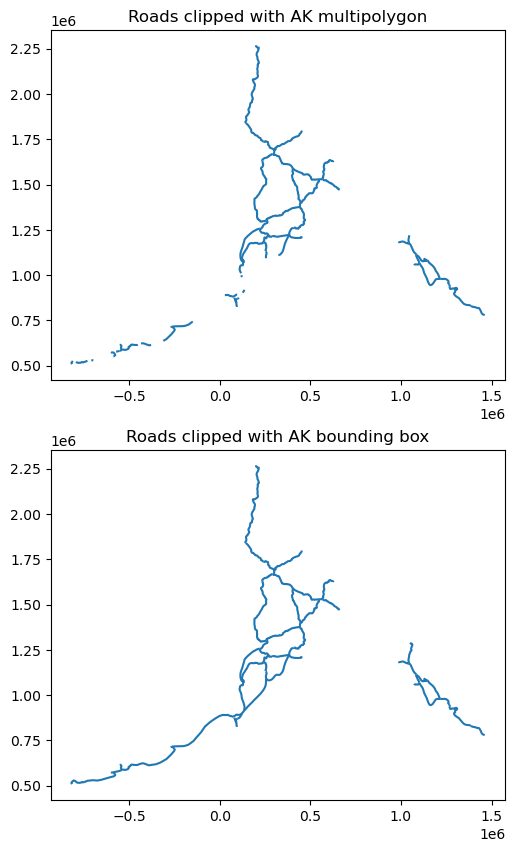

In [92]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax=ax2)
ax2.set_title('Roads clipped with AK bounding box')

plt.show()

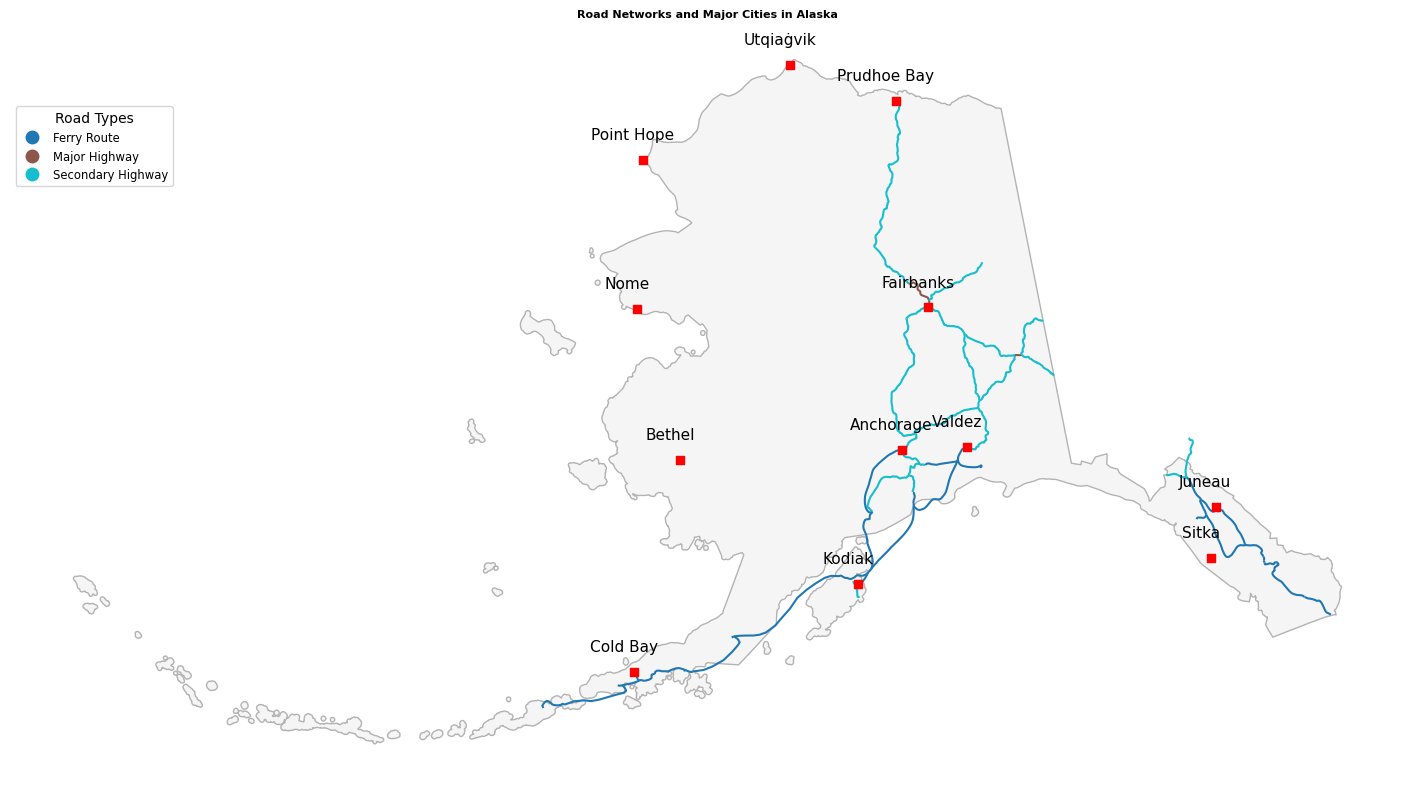

In [107]:
fig, ax = plt.subplots(figsize=(18,10))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    ax.text(x-30000, y+60000, name, fontsize=11, ha='center')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=8, fontweight='bold')

plt.show()